In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


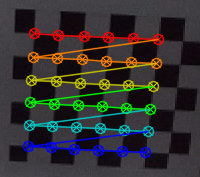

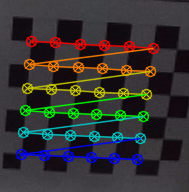

Matriz Intrínseca:
 [[1.95560661e+03 0.00000000e+00 1.04110266e+02]
 [0.00000000e+00 2.95705942e+03 1.19994999e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Coeficientes de Distorção:
 [[ 1.20252746e+00 -4.68183069e+02 -7.02006578e-02  6.68168099e-03
  -1.68610230e+00]]
Vetores de Rotação:
 (array([[ 0.91702143],
       [-0.06049888],
       [ 0.0683506 ]]), array([[ 0.90788042],
       [-0.09781365],
       [ 0.08461615]]))
Vetores de Translação:
 (array([[-2.81491721],
       [-2.29270789],
       [78.55044863]]), array([[-2.96584576],
       [-2.10414628],
       [79.48765444]]))


In [ ]:
import cv2
import numpy as np
import glob
from google.colab.patches import cv2_imshow

# Configurações do tabuleiro de xadrez
chessboard_size = (6, 6)
frame_size = (3000, 4000)

# Critérios de subpixel
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Preparar pontos do mundo 3D, como (0,0,0), (1,0,0), (2,0,0) ...,(6,5,0)
objp = np.zeros((chessboard_size[0] * chessboard_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1, 2)

# Vetores para armazenar pontos 3D do mundo e pontos 2D da imagem para todas as imagens
objpoints = [] # Pontos 3D no mundo real
imgpoints = [] # Pontos 2D no plano da imagem

# Carregar imagens do tabuleiro de xadrez
images = glob.glob('/content/drive/MyDrive/tabuleiro/tab/*.png')

for image in images:
    img = cv2.imread(image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Encontrar os cantos do tabuleiro de xadrez
    ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None)

    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners2)

        # Desenhar e exibir os cantos
        cv2.drawChessboardCorners(img, chessboard_size, corners2, ret)
        cv2_imshow(img)
        cv2.waitKey(1000)

cv2.destroyAllWindows()

# Calibrar a câmera
ret, camera_matrix, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print("Matriz Intrínseca:\n", camera_matrix)
print("Coeficientes de Distorção:\n", dist_coeffs)
print("Vetores de Rotação:\n", rvecs)
print("Vetores de Translação:\n", tvecs)